# Assignmnet 1 (100 points)

**Name: Kotomi Fukushima** <br>
**Email: kof6267@thi.de** <br>
**Group:** A <br>
**Hours spend *(optional)* :** <br>

General Rules:

- No helping libraries allowed.
- The use of standard libraries provided by the programming language itself (e.g., built-in data structures like lists and dictionaries, basic input/output functions, core mathematical functions) is generally permitted. These are considered fundamental to the language and not "helping libraries" in the context of this regulation
- If you need to use special Python modules, you can discuss with your instructor before submission.
- You can use the provided libraries but not mndatary.
- Always try To bulid your code from scratch.


### Question 1: Zipf’s law *(20 points)*

<p>Verify Zipf’s law on a textual corpus. The jungle book dataset is provided in the "Datasets and Resources" file. (You can also use any other dataset of your choice). <p>

<p> Provide a list of unique word sorted by their frequency in descending order. Also, give a brief discussion of the findings. You can use matplotlib library to plot the linear curve, and a log-log curve.</p>



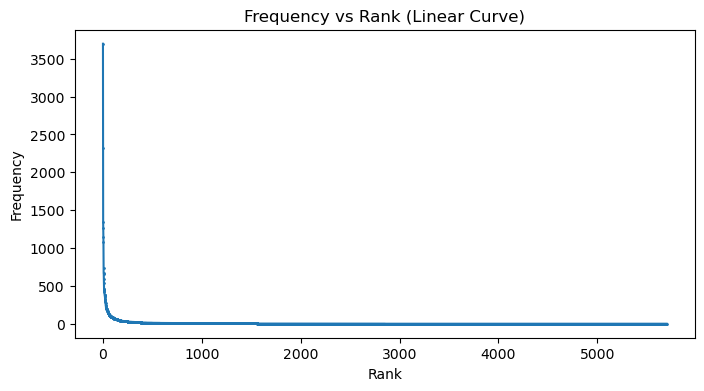

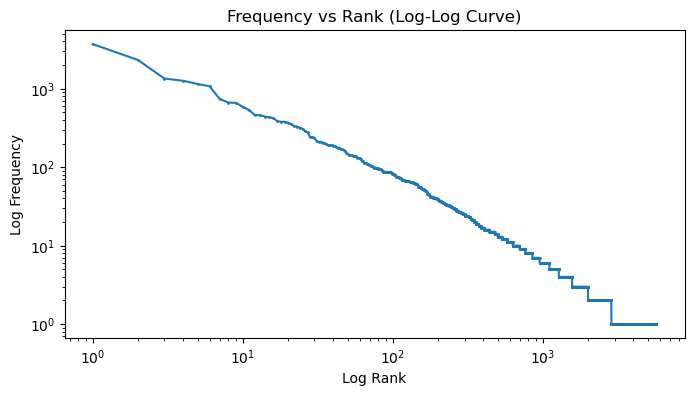

list of unique word sorted by their frequency in descending order:  ['the', 'and', 'of', 'to', 'a', 'he', 'in', 'that', 'his', 'i', 'was', 'for', 'is', 'said', 'with', 'as', 'it', 'they', 'on', 'him', 'all', 'but', 'you', 'at', 'not', 'had', 'up', 'or', 'little', 'have', 'when', 'out', 'mowgli', 'be', 'by', 'are', 'one', 'my', 'there', 'down', 'we', 'will', 'were', 'then', 'from', 'this', 'would', 'me', 'no', 'their', 'if', 'them', 'what', 'into', 'jungle', 'very', 'who', 'do', 'so', 'head', 'could', 'go', 'back', 'bagheera', 'where', 'never', 'big', 'like', 'come', 'man', 'now', 'any', 'can', 'nag', 'time', 'more', 'two', 'thou', 'went', 'rikkitikki', 'came', 'men', 'toomai', 'baloo', 'wolf', 'see', 'over', 'has', 'project', 'away', 'old', 'again', 'been', 'people', 'shere', 'must', 'your', 'our', 'off', 'know', 'elephants', 'sea', 'than', 'only', 'am', 'night', 'thee', 'good', 'an', 'about', 'long', 'kotick', 'till', 'khan', 'made', 'eyes', 'did', 'us', 'himself', 'kala', 'feet', 'kn

In [4]:
### You migh use these libraries if needed.

import matplotlib.pyplot as plt
import string

###### TO DO ##########
def read_file(path):
    with open(path, "r", encoding = "utf-8") as file:
        text = file.read().lower().replace("\n", " ") #convert to lowercase and remove new lines
    return text


def clean_text(text): #remove punctuations and symbols
    clean_text = "" #initialize clean text
    for char in text:
        if char.isalnum() or char.isspace():
            clean_text += char
        else:
            clean_text += ""
    return clean_text


def word_count(cleaned_text):
    word_count = {} #make a dictionary {word : frequency}
    word = "" #temporary string to recognize the word
    for char in cleaned_text:
        if char != " ":
            word += char
        else: #when it reaches to the space
            if word: #ensure the word is not empty
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                word = ""
                
    if word: #handling the last word which is without a space
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
            word = ""
    return word_count

def load_and_prepare(path):
    text = read_file(path)
    cleaned = clean_text(text)
    words = cleaned.split() #list of words
    return cleaned, words


cleaned_text, jungle_words = load_and_prepare("Datasets and resources/jungle_book.txt")
counted_word = word_count(cleaned_text)
word_count_sorted = dict(sorted(counted_word.items(), key = lambda item: item[1], reverse = True)) #sort words from highest to lowest frequency
word_sorted_des = list(word_count_sorted.keys()) # list of unique word sorted by their frequency in descending order

ranks = [] #make a list of ranks
for rank, _ in enumerate(word_count_sorted.items()):
    ranks.append(rank + 1)

freq = [] #make a list of frequencies
for _, frequency in word_count_sorted.items():
    freq.append(frequency)


#plot linear curve
plt.figure(figsize=(8, 4))
plt.plot(ranks, freq, marker="o", markersize=1)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Frequency vs Rank (Linear Curve)")
plt.show()

#plot log-log curve
plt.figure(figsize=(8, 4))
plt.loglog(ranks, freq, marker="o", markersize=1)
plt.xlabel("Log Rank")
plt.ylabel("Log Frequency")
plt.title("Frequency vs Rank (Log-Log Curve)")
plt.show()

print("list of unique word sorted by their frequency in descending order: ", word_sorted_des)


### Question 2: Mutual Information *(30 points)*

<p>Pointwise mutual information quantifies the statistical dependence between events ${x_{t} = w_{1} }$ and ${ x_{t+1} = w_{2}}$. ${C(w)}$ is the absolute frequency and ${N}$ is the size of the corpus. If the probability of the next word in the corpus (${w_{2}}$) is affected by the probability of the previous word (${w_{1}}$), then ${pmi(w_{1},w_{2}) = 0}$; else the pmi value is either positive or negative. </p>

$$ pmi(w_{1},w_{2}) = log \frac{P(x_{t} = w_{1}, x_{t+1} = w_{2})} {P(x_{t} = w_{1}) . P(x_{t+1} = w_{2})} \approx log \frac {C(w_{1}w_{2}) . N} {C(w_{1}) . C(w_{2})}  $$

<p>Calculate the Pointwise mutual information (PMI) for all successive word pairs (w1, w2) in the jungle book corpus. Words (not word pairs) that occur in the corpus less than 10 times should be ignored. List the 30 word pairs with the highest pmi value and the 30 word pairs with the lowest pmi value. Document your observations and discuss the validity of the independence assumption for unigram models. </p>


In [5]:
### You migh use these libraries if needed.

import string
import math
from collections import Counter

###### TO DO ######### 

def bigram_count(words):
    word_pair = {} #make a dictionary {(pair): freq}
    
    for i in range(len(words) - 1):
        w1 = words[i]
        w2 = words[i+1]
        pair = (w1, w2)
    
        if pair in word_pair:
            word_pair[pair] += 1
        else:
            word_pair[pair] = 1
    return word_pair



#ignore words that occure less than 10 times
low_freq_words = [word for word, freq in word_count_sorted.items() if freq < 10]
clean_text_pmi = [word for word in jungle_words if word not in low_freq_words]

n = len(clean_text_pmi)
word_pair_pmi = bigram_count(clean_text_pmi)

pmi = {} #make a dictionary {(pair): pmi}

for pair, freq in word_pair_pmi.items():
    w1, w2 = pair
    c_w1 = counted_word[w1]
    c_w2 = counted_word[w2]
    pmi_val = math.log((freq * n) / (c_w1 * c_w2))
    pmi[pair] = pmi_val
    
pmi_sorted = sorted(pmi.items(), key = lambda item: item[1], reverse = True) #sort pmi from high to low

pmi_high = dict(pmi_sorted[:30])
pmi_low = dict(reversed(pmi_sorted[-30:]))

print("high pmi values: ", pmi_high)
print("low pmi values: ", pmi_low)

high pmi values:  {('machua', 'appa'): 8.286246776789005, ('literary', 'archive'): 8.12924302797934, ('united', 'states'): 7.986142184338667, ('darzees', 'wife'): 7.698460111886886, ('archive', 'foundation'): 7.6031499320825615, ('cold', 'lairs'): 7.447145683605981, ('gutenberg', 'literary'): 7.292995003778723, ('stretched', 'myself'): 7.187634488120896, ('petersen', 'sahib'): 7.130186261208349, ('hind', 'legs'): 6.98761335422754, ('fore', 'paws'): 6.910002751522616, ('twenty', 'yoke'): 6.8493781297061815, ('whole', 'line'): 6.71763085887516, ('electronic', 'works'): 6.705208338876603, ('hind', 'flippers'): 6.686859200208406, ('master', 'words'): 6.668840694705728, ('years', 'ago'): 6.640669817739032, ('bring', 'news'): 6.622320679070835, ('mans', 'cub'): 6.605926869295159, ('council', 'rock'): 6.5045376434144515, ('black', 'panther'): 6.5028555572314675, ('moon', 'rose'): 6.49448730756095, ('khans', 'hide'): 6.482064787562393, ('wolfs', 'cave'): 6.399177127756626, ('mothers', 'heart')

### Question 3: Wikipedia language model *(50 points)*

<p> A customer of yours is dissatisfied with the quality of the speech recognition. After a conversation with the customer, you find out that he dictates books. The initial investigations on a book excerpt have shown that the language model used is not suitable. For building a better language model for the application, you have asked your customer to provide a text from the book (see "Datasets and Resources") </p>

<p> In order to save costs and also to avoid problems with copyrights, your company has decided not to use existing solutions for this project. So, you have to implement a 2-gram language model in Python from scratch. Include a short description of the data preprocessing steps, method, experiment design, hyper-parameters, and evaluation metric. Also, document your findings, drawbacks, and potential improvements.</p>



<h4> Datasets and Resources </h4>

* WikiText-2 (raw/unprocessed), Train, Dev, Test

In [8]:
######## You might use these libraries if needed.

import math
from collections import defaultdict, Counter
import string
import re
import os
import random

####### TO DO #######
def read_file(path):
    with open(path, "r", encoding = "utf-8") as file:
        text = file.read().lower().replace("\n", " ") #convert to lowercase and remove new lines
    return text


def clean_text(text): #remove punctuations and symbols
    clean_text = "" #initialize clean text
    for char in text:
        if char.isalnum() or char.isspace():
            clean_text += char
        else:
            clean_text += ""
    return clean_text


def word_count(cleaned_text):
    word_count = {} #make a dictionary {word : frequency}
    word = "" #temporary string to recognize the word
    for char in cleaned_text:
        if char != " ":
            word += char
        else: #when it reaches to the space
            if word: #ensure the word is not empty
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                word = ""
                
    if word: #handling the last word which is without a space
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
            word = ""
    return word_count


def load_and_prepare(path):
    text = read_file(path)
    cleaned = clean_text(text)
    words = cleaned.split()
    return cleaned, words


def bigram_count(words):
    word_pair = {} #make a dictionary {(pair): freq}
    
    for i in range(len(words) - 1):
        w1 = words[i]
        w2 = words[i+1]
        pair = (w1, w2)
    
        if pair in word_pair:
            word_pair[pair] += 1
        else:
            word_pair[pair] = 1
    return word_pair
    
    
def suggest_next(input, vocab, bigram, word_count):
    last_word = input.split()[-1]
    error = f"There is no information about next word of '{last_word}' in the train data..."

    #if the word is not in the train model
    if last_word not in word_count:
        return error
        
    possible_vocab = {}
    vocab_probability = {}
    

    #iterate through every vocabrary, count (last_word, vacab) pair and store {possible_word: frequency}
    for word in vocab:
        pair = (last_word, word)
        if pair in bigram:
            possible_vocab[word] = bigram[pair]

    #if no bigrams start with this word, return None
    if not possible_vocab:
        return error

    #iterate through every possible vocabrary, calculate bigram probability and store (possible_word: bigram_probability)
    for word, freq in possible_vocab.items():
        w1 = last_word
        w2 = word
        prob = possible_vocab[word] / word_count[last_word]
        vocab_probability[word] = prob

    sorted_vocab_probability = sorted(vocab_probability.items(), key = lambda item: item[1], reverse = True) #sort probability from high to low
    suggestion = sorted_vocab_probability[0][0]
    return suggestion

def validate(valid_words, train_vocab, train_bigram, train_word_count, max_word=1000):
    correct = 0
    total = 0

    #randomly select indices of valid_words up to max_word (1000)
    random_indices = random.sample(range(len(valid_words) - 1), max_word)

    #iterate through every words in random_indices using index number, check actual next word in valid_words and predicted_word, and count correct suggestions
    for i in random_indices:
        word = valid_words[i]
        actual_word = valid_words[i + 1]

        #skip iteration if word is the last word 
        if not actual_word:
            continue
            
        predicted_word = suggest_next(word, train_vocab, train_bigram, train_word_count)

        #skip iteration if predicted_word is an error message
        if "no information" in predicted_word:
            continue

        if actual_word == predicted_word:
              correct += 1
        total += 1

    accuracy = correct / total if total > 0 else 0
    return accuracy
    
        

    
        
train_cleaned, train_words = load_and_prepare("Datasets and resources/wikitext-2-raw-v1/wikitext-2-raw/wiki.train.raw")

train_word_count = word_count(train_cleaned)
train_vocab = list(train_word_count)
train_bigram = bigram_count(train_words)
valid_cleaned, valid_words = load_and_prepare("Datasets and resources/wikitext-2-raw-v1/wikitext-2-raw/wiki.valid.raw")
test_cleaned, test_words = load_and_prepare("Datasets and resources/wikitext-2-raw-v1/wikitext-2-raw/wiki.test.raw")

val_accuracy = validate(valid_words, train_vocab, train_bigram, train_word_count)
print("Validation Accuracy:", val_accuracy)

test_accuracy = validate(test_words, train_vocab, train_bigram, train_word_count)
print("Test Accuracy:", test_accuracy)

# suggestion = suggest_next("robert boulter the", cleaned_text_wiki, wiki_vocab, wiki_pair, wiki_word_count)



#I used chatGPT for help


Validation Accuracy: 0.14182939362795477
Test Accuracy: 0.15641293013555788


### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*


- Calculate Bigram Probabilities with Back-off.
- Demonstrate and discuss your Back-off implementation.
